In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

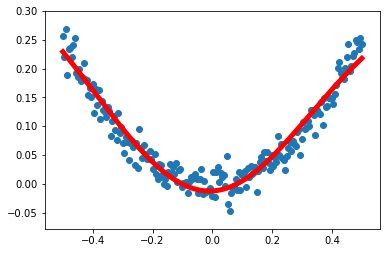

In [24]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]#这样可以生成列向量，相当于是两维的
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#1*10*1的神经网络，中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.reduce_mean(tf.square(prediction - y))

#定一个梯度下降法来进行训练的优化器
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)#学习率

with tf.Session() as sess:
    #变量用到就要初始化
    sess.run(tf.global_variables_initializer())
    for step in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})#忘了placeholder了
        
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()#函数后面一定要记得加括号
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw = 5)
    plt.show()